## Exploring new ways to represent data to the model

In [27]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path.cwd().parent))

parent_data_path = Path.cwd().parent / 'Training_Data' / 'fully_curated' / 'full_curated'
song_dirs = [parent_data_path / x for x in os.listdir(parent_data_path)]
chart_paths = [x / 'notes.chart' for x in song_dirs]
audio_paths = [x / 'other.wav' for x in song_dirs]

### Get the simplified notes array and raw audio

In [29]:
from tensor_hero.preprocessing.chart import chart2tensor
from tensor_hero.preprocessing.data import __remove_modifiers, __remove_release_keys
import numpy as np
import librosa

# Get the simplified notes array
notes_array = chart2tensor(chart_paths[0])
notes_array = __remove_modifiers(__remove_release_keys(notes_array))

data, sr = librosa.load(str(audio_paths[0]))  # waveform, sample rate (samples/second)
                                 

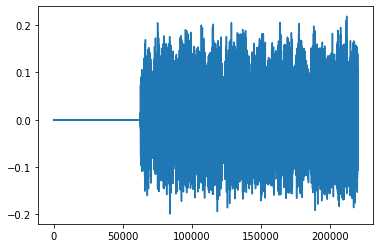

In [30]:
import matplotlib.pyplot as plt

plt.plot(data[:(sr*10)])  # First 10 seconds of audio data

### Look at the spectrogram of the audio

In [12]:
from tensor_hero.preprocessing.audio import compute_mel_spectrogram

spec = compute_mel_spectrogram(audio_paths[0])

In [13]:
spec.shape

(512, 24015)

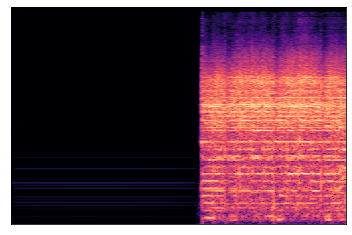

In [14]:
librosa.display.specshow(spec[:,:500])

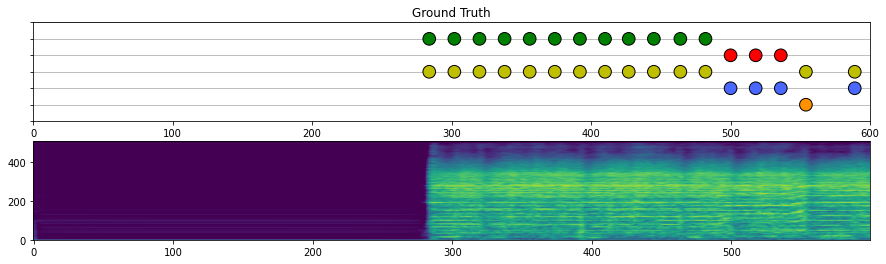

In [25]:
_ = plot_chart(ground_truth=notes_array[:600], audio=spec[:,:600])

In [24]:
print(notes_array[475:525])

[ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.  0.]
